# Problem Statement
The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.
Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.
With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

As a senior ML Engineer, need to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

## Starting with EDA

In [1]:
# importing necessary library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import string
import os, sys
from time import time
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [2]:
# reading data file
review= pd.read_csv("sample30.csv")

In [3]:
# displaying the first few rows of dataset
review.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [4]:
# seeing the size of data setprovided
review.shape

(30000, 15)

In [5]:
# reviewing the data set columns
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [6]:
#From above we can see out of 30000 entries in csv in reviews_userCity & reviews_userProvince has 1929 & 170 entries respectively which is only 6% &.56% of the total data entries
#It will not make any sense hence dropping these two columns 
review=review.drop(["reviews_userCity","reviews_userProvince"],axis=1)

In [7]:
#reviewing data columns after dropping two columns
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   30000 non-null  object
 1   brand                30000 non-null  object
 2   categories           30000 non-null  object
 3   manufacturer         29859 non-null  object
 4   name                 30000 non-null  object
 5   reviews_date         29954 non-null  object
 6   reviews_didPurchase  15932 non-null  object
 7   reviews_doRecommend  27430 non-null  object
 8   reviews_rating       30000 non-null  int64 
 9   reviews_text         30000 non-null  object
 10  reviews_title        29810 non-null  object
 11  reviews_username     29937 non-null  object
 12  user_sentiment       29999 non-null  object
dtypes: int64(1), object(12)
memory usage: 3.0+ MB


In [8]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(review.isnull().sum()/len(review.index)), 2)

id                      0.00
brand                   0.00
categories              0.00
manufacturer            0.47
name                    0.00
reviews_date            0.15
reviews_didPurchase    46.89
reviews_doRecommend     8.57
reviews_rating          0.00
reviews_text            0.00
reviews_title           0.63
reviews_username        0.21
user_sentiment          0.00
dtype: float64

In [9]:
# as we will be doing product recommendation it doesn't need Date hence we can drop the same
review=review.drop(["reviews_date"],axis=1)

In [10]:
review.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [11]:
review.isnull().sum()

id                         0
brand                      0
categories                 0
manufacturer             141
name                       0
reviews_didPurchase    14068
reviews_doRecommend     2570
reviews_rating             0
reviews_text               0
reviews_title            190
reviews_username          63
user_sentiment             1
dtype: int64

In [12]:
# in manufacturer column there are .47% missing
review[review['manufacturer'].isnull()]

,id,brand,categories,manufacturer,name,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
22210,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),NaN,False,1,I have read the entire Alex Cross series and I...,Disappointing casting,poorcrossing,Negative
22211,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),NaN,False,1,Idris Elba was originally cast in the lead rol...,Atrocious casting,naberios,Positive
22212,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),NaN,False,2,I was way more excited or this movie than I sh...,Meh,jz30,Positive
22213,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),NaN,False,2,I'm a huge fan of James Patterson and although...,Disappointing Movie,david,Positive
22214,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),NaN,True,3,"not as exciting as the book, but very good",Alex Cross Dvd,bobc,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
22346,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),NaN,True,5,"Alex Cross the movie, was astoundingly outstan...",Wonderful Movie,constable6,Positive
22347,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),NaN,True,5,I had no clue that this movie would be this en...,Tyler Perry,tjones,Positive
22348,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),NaN,True,5,Must see action! Great acting and great movie ...,Thriller,hmalave29,Positive
22349,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),NaN,True,5,"My mom and I are big fans of the books. So, I ...",Alex Cross Fans Will Not Be Disappointed,ocgirlie007,Positive


In [13]:
# from above we can see that Summit Entertainment Brand has the column of manufacturer missing. We can impute the column of manufacturer corresponding to Summit Entertainment with the same
review.manufacturer.fillna(review.brand,inplace= True)

In [14]:
# inspecting if any manufacturer value is remaining null
review.isnull().sum()

id                         0
brand                      0
categories                 0
manufacturer               0
name                       0
reviews_didPurchase    14068
reviews_doRecommend     2570
reviews_rating             0
reviews_text               0
reviews_title            190
reviews_username          63
user_sentiment             1
dtype: int64

In [15]:
#inspect review_text column
review["reviews_text"].head()


0    i love this album. it's very good. more to the...
1    Good flavor. This review was collected as part...
2                                         Good flavor.
3    I read through the reviews on here before look...
4    My husband bought this gel for us. The gel cau...
Name: reviews_text, dtype: object

In [16]:
# inspect reviews_title column
review["reviews_title"].head(5)

0    Just Awesome
1            Good
2            Good
3    Disappointed
4      Irritation
Name: reviews_title, dtype: object

In [17]:
# changing the data type to string
review["reviews_title"]=review["reviews_title"].astype('str')

In [18]:
# in review_title column there are numbers which we can replace it with blank to get a clear text
review["reviews_title"] = review["reviews_title"].str.replace('\d', ' ')

In [19]:
# we can see in reviews_title tere are 190 rows blank lets combine the two columns into reviews_text 

review["reviews_text"] = review["reviews_title"].str.cat(review["reviews_text"], sep =" ")

In [20]:
review["reviews_text"].head(5)

0    Just Awesome i love this album. it's very good...
1    Good Good flavor. This review was collected as...
2                                    Good Good flavor.
3    Disappointed I read through the reviews on her...
4    Irritation My husband bought this gel for us. ...
Name: reviews_text, dtype: object

In [21]:
review.isnull().sum()

id                         0
brand                      0
categories                 0
manufacturer               0
name                       0
reviews_didPurchase    14068
reviews_doRecommend     2570
reviews_rating             0
reviews_text               0
reviews_title              0
reviews_username          63
user_sentiment             1
dtype: int64

In [22]:
#deleting reviews_title column as the data has been merged to reviews_text
review=review.drop(["reviews_title"],axis=1)

In [23]:
# checking the columns after dropping some columns which are not necessary 
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   30000 non-null  object
 1   brand                30000 non-null  object
 2   categories           30000 non-null  object
 3   manufacturer         30000 non-null  object
 4   name                 30000 non-null  object
 5   reviews_didPurchase  15932 non-null  object
 6   reviews_doRecommend  27430 non-null  object
 7   reviews_rating       30000 non-null  int64 
 8   reviews_text         30000 non-null  object
 9   reviews_username     29937 non-null  object
 10  user_sentiment       29999 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.5+ MB


User_sentiment, reviews_rating & reviews_doRecommend are correlated. As depending on the rating provided, user_sentiment & reviews_do recommend matter. Hence in below we will be inspecting these columns one by one

Inspecting reviews_rating column. As rating is the most important feature in any recommendation system

In [24]:
# inspecting reviews_rating column
review["reviews_rating"].value_counts()

5    20831
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

In [25]:
review["reviews_rating"].describe()

count    30000.000000
mean         4.483133
std          0.988441
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews_rating, dtype: float64

In [26]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(review.reviews_rating.min()))
print('Maximum rating is: %d' %(review.reviews_rating.max()))

Minimum rating is: 1
Maximum rating is: 5


C:\Users\Admin\anoconda4\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


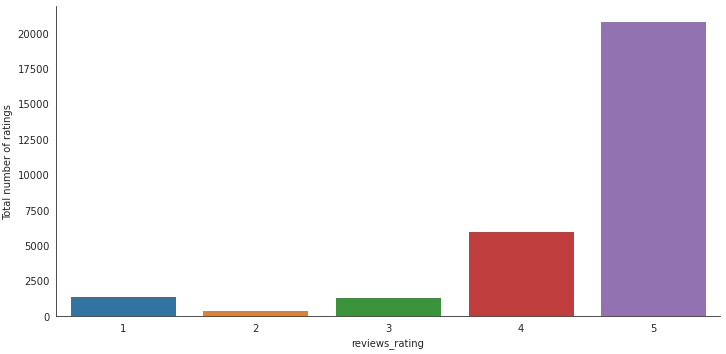

In [27]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("reviews_rating", data=review, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

Inspecting user_sentiment column

In [28]:
review["user_sentiment"].value_counts()

Positive    26632
Negative     3367
Name: user_sentiment, dtype: int64

In [29]:
review["user_sentiment"].describe()

count        29999
unique           2
top       Positive
freq         26632
Name: user_sentiment, dtype: object

In [30]:
# inspecting user_sentiment column

review["user_sentiment"].isnull().sum()

1

In [31]:
# if review_rating is greater than or equal than 3 that we can consider user_sentiment should be positive for the product. Lets see in case if by chance if there are any rows where ratings are high still user_sentiment is negative
review[(review.reviews_rating >=3) & (review.user_sentiment =='Negative')]

,id,brand,categories,manufacturer,name,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_username,user_sentiment
19,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,False,False,3,First time using It was my first time using k-...,browns fan,Negative
42,AV1h6Gu0glJLPUi8IjA_,Johnson's,"Personal Care,Baby Care,Baby Bubble Bath,Baby,...",Johnson's,"Johnson's Baby Bubble Bath and Wash, 15oz",False,True,3,It's bubble bath. You would think it's conveni...,gardenbunny318,Negative
83,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,False,True,3,This product is an oldie but goodie! I would r...,preacherjackson1,Negative
92,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,False,True,4,hydrating but not too heavy It hydrates my ski...,janicec,Negative
96,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,False,True,4,This product has made a real difference on my ...,deedeedeedeesqr,Negative
...,...,...,...,...,...,...,...,...,...,...,...
29818,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,False,NaN,5,Great Product I received a complimentary sampl...,cindi d,Negative
29855,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,False,True,5,Great This has prolonged the color in my hair!...,meghanz,Negative
29858,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,False,True,5,Makes my hair soft and shiny without excess oi...,melissa7390,Negative
29862,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,False,True,5,Great Conditioner This conditioner has become ...,kacils,Negative


From above we can see that there are around 2630 records where ratings are high but sentiment given is opposite we should clean the user_sentiment column wrt rating. If rating is greater than 3 then user_sentiment should be positive else negative

In [32]:
review['user_sentiment']=review['reviews_rating'].apply(lambda x: 'Positive' if x >=3 else 'Negative')

In [33]:
# lets recheck again after replacing if review_rating is greater than or equal than 3any user_sentiment is negative or not
review[(review.reviews_rating >=3) & (review.user_sentiment =='Negative')]

,id,brand,categories,manufacturer,name,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_username,user_sentiment


Now there is no mismatch of user_sentiment with reviews_rating

From sentiment columns we get an idea about what is the sentiment of people for particular products. With the help of Sentiment column we can impute corresponding null values in do_recommend column. 

In [34]:
# checking after imputing values corresponding to rating if any the null values present in user_sentiment column as before impute there was 1 missing value
review["user_sentiment"].isnull().sum()

0

Now inspecting reviews_doRecommend column

In [35]:
# checking the null values present in reviews_doRecommend column
review["reviews_doRecommend"].isnull().sum()

2570

In [36]:
review["reviews_doRecommend"].value_counts()

True     25880
False     1550
Name: reviews_doRecommend, dtype: int64

Again taking rating as base we will impute the corresponding value in do_recommend column. As there are no null values in rating it will also handle 2570  null values present in reviews_doRecommend

In [37]:
review['reviews_doRecommend']=review['reviews_rating'].apply(lambda x: 'True' if x >=3 else 'False')

In [38]:
review["reviews_doRecommend"].isnull().sum()

0

In [39]:
review["reviews_doRecommend"].value_counts()

True     28196
False     1804
Name: reviews_doRecommend, dtype: int64

C:\Users\Admin\anoconda4\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


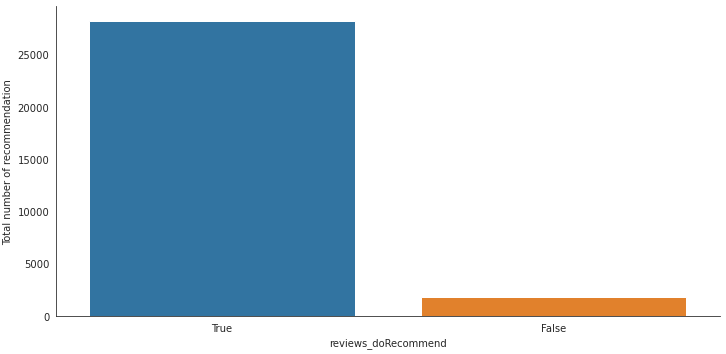

In [40]:
# Check the distribution of the recommendation as column of do_recommend is clean now
with sns.axes_style('white'):
    g = sns.factorplot("reviews_doRecommend", data=review, aspect=2.0,kind='count')
    g.set_ylabels("Total number of recommendation")

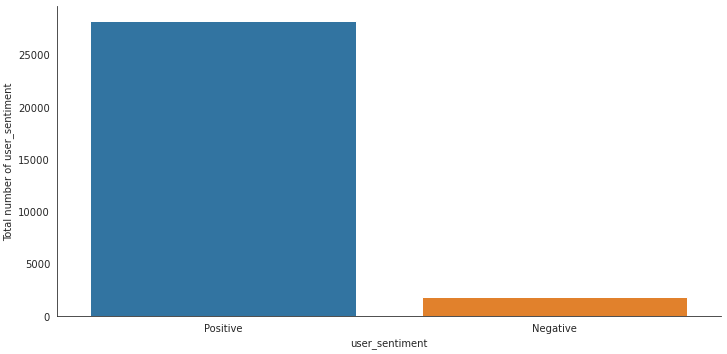

In [41]:
# Check the distribution of the  user_ sentiment as column of do_recommend is clean now
with sns.axes_style('white'):
    g = sns.factorplot("user_sentiment", data=review, aspect=2.0,kind='count')
    g.set_ylabels("Total number of user_sentiment")

In [42]:
#Again inspecting which columns have now null values 
review.isnull().sum()

id                         0
brand                      0
categories                 0
manufacturer               0
name                       0
reviews_didPurchase    14068
reviews_doRecommend        0
reviews_rating             0
reviews_text               0
reviews_username          63
user_sentiment             0
dtype: int64

From above we can see reviews_didPurchase & reviews_username have null values remaining 

In [43]:
# In review_did Purchase column we can see 14068 rows are blank which is around 46.8% Also product will be shown based on the recommendation whether purchased or not. Hence purchse column can be deleted.
review=review.drop(["reviews_didPurchase"],axis=1)

In [44]:
# In recommendation usually we look for brand & category here manufacturer will be matter much also brands are almost same as manufacturer hence we can delete manufacturer
#review=review.drop(["manufacturer"],axis=1)

In [45]:
review.isnull().sum()


id                      0
brand                   0
categories              0
manufacturer            0
name                    0
reviews_doRecommend     0
reviews_rating          0
reviews_text            0
reviews_username       63
user_sentiment          0
dtype: int64

In [46]:
# lets inspect reviews_username
review["reviews_username"].value_counts()

byamazon customer    41
mike                 41
chris                32
lisa                 16
rick                 15
                     ..
usachris2000          1
keli26                1
ejohnson              1
beth421               1
leo1                  1
Name: reviews_username, Length: 24914, dtype: int64

There might be possible that same user may rate same product again and again creating duplicate record hence lets delete the duplicate records where user have rated same prouct id again & again

In [47]:
review.drop_duplicates(subset=["reviews_username","id"],inplace=True)

In [48]:
#inspecting the shape of review data frame after dropping duplicates on basis of review_username & id
review.shape

(27605, 10)

In [49]:
review["reviews_username"].isnull().sum()

17

In [50]:
review = review.dropna(axis=0, subset=['reviews_username'])

In [51]:
review.isnull().sum()

id                     0
brand                  0
categories             0
manufacturer           0
name                   0
reviews_doRecommend    0
reviews_rating         0
reviews_text           0
reviews_username       0
user_sentiment         0
dtype: int64

In [52]:
review.shape

(27588, 10)

## Analysing the products wrt to rating & users

In [53]:
#Analysis of rating given by the product

no_of_rated_products_per_product = review.groupby(by='id')['reviews_rating'].count().sort_values(ascending=False)

no_of_rated_products_per_product.head()

id
AVpf3VOfilAPnD_xjpun    7786
AVpfPaoqLJeJML435Xk9    3148
AVpfJP1C1cnluZ0-e3Xy    1893
AVpfRTh1ilAPnD_xYic2    1097
AVpf63aJLJeJML43F__Q     873
Name: reviews_rating, dtype: int64

In [54]:
no_of_rated_products_per_product.describe()

count     271.000000
mean      101.800738
std       536.891924
min         1.000000
25%         3.000000
50%         8.000000
75%        28.500000
max      7786.000000
Name: reviews_rating, dtype: float64

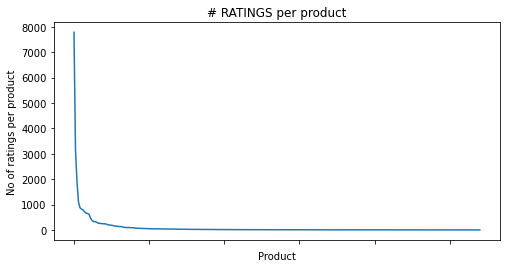

In [55]:
fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_rated_products_per_product.values)
plt.title('# RATINGS per product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [56]:
#Analysis of rating given by the user 

no_of_rated_products_per_username = review.groupby(by='reviews_username')['reviews_rating'].count().sort_values(ascending=False)

no_of_rated_products_per_username.head()

reviews_username
mike     17
lisa     15
chris    13
sandy    12
rick     12
Name: reviews_rating, dtype: int64

In [57]:
no_of_rated_products_per_username.describe()

count    24914.000000
mean         1.107329
std          0.507441
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         17.000000
Name: reviews_rating, dtype: float64

In [58]:
#Analysis of rating given by the brand

no_of_rated_per_brand = review.groupby(by='brand')['reviews_rating'].count().sort_values(ascending=False)

no_of_rated_per_brand.head()


brand
Clorox               9680
Warner Home Video    3148
Disney               1153
Burt's Bees           881
FOX                   844
Name: reviews_rating, dtype: int64

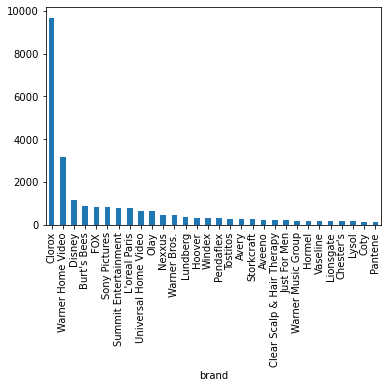

In [59]:
no_of_rated_per_brand.head(30).plot(kind= "bar")

In [60]:
# lets check the average mean rating ofproducts 
C=review["reviews_rating"].mean()

In [61]:
print(C)

4.5186675366101205


From above we can see average rating of product is 4.5

### Product Recommendation System

In this we will be building User User & Item item recommendation system

In [62]:
#let's copy the review datafram to recommendation dataframe & we will be using recommendation dataframe for product recommendation model
recommend=review

In [63]:
recommend.isnull().sum()

id                     0
brand                  0
categories             0
manufacturer           0
name                   0
reviews_doRecommend    0
reviews_rating         0
reviews_text           0
reviews_username       0
user_sentiment         0
dtype: int64

In [64]:
# Since for recommending product to user we require product id, review_username,brand, categories, name of the product. Hence only keeping this in new data frame recommendation
recommendation=recommend[['id','brand','categories','name','reviews_username','reviews_rating']]


In [65]:
recommendation.isnull().sum()

id                  0
brand               0
categories          0
name                0
reviews_username    0
reviews_rating      0
dtype: int64

In [66]:
recommendation.shape

(27588, 6)

Dividing the data set into test and train

In [67]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(recommendation, test_size=0.30, random_state=31)

In [68]:
print(train.shape)
print(test.shape)

(19311, 6)
(8277, 6)


In [69]:
# Pivot the train ratings' dataset into matrix format in which columns are product id and the rows are reviews_username.
df_pivot = train.pivot(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)

df_pivot.head(3)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [71]:
# The product not rated by user is marked as 1 for prediction as we want to focus on products not rated
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [72]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

In [73]:
#products which were not ratedis now donated by 1
dummy_train.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [74]:
dummy_train.shape

(17891, 255)

Using Cosine similarity to quantify similarity between two vector.We need to establish similarity between user user or item item

In [75]:
df_pivot.index.nunique()

17891

In [76]:
from sklearn.metrics.pairwise import pairwise_distances

In [77]:
# Creating the user similarity matrix using pairwise_distance function
# it helps us to understand the similarity betweenpair wise distance. If distance is very high then similarity willl be low and vice versa hence we need to substract from 1
user_correlation= 1- pairwise_distances(df_pivot, metric = 'cosine')
user_correlation[np.isnan(user_correlation)]=0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]]


In [78]:
user_correlation.shape

(17891, 17891)

In [79]:
# Create user product matrix to see how user has rated product and we can calculate the average of the rating given by user later on
df_pivot = train.pivot(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
)

In [80]:
df_pivot.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df_pivot.shape

(17891, 255)

Normalising the rating of the product for each user around 0 mean. Nan Mean is will help us to calculate the average for the ratings given

In [82]:
# nan mean will give us the array of the mean rating given for the users. To normalise the value we have to substract by transforming and again transform it back
mean=np.nanmean(df_pivot, axis=1)
df_substracted=(df_pivot.T-mean).T

In [83]:
mean.shape

(17891,)

In [84]:
df_pivot.T.shape

(255, 17891)

In [85]:
df_substracted.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df_substracted.shape

(17891, 255)

Lets calculate the cosine similarity using pair wise distances using adjusted cosine

In [87]:
from sklearn.metrics.pairwise import pairwise_distances

In [88]:
#creating the user similarity matrix using pairwise_distance function
user_correlation = 1 - pairwise_distances(df_substracted.fillna(0), metric='cosine')
# if there is any nan value to handle it we need to make it 0
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [89]:
user_correlation.shape

(17891, 17891)

## Prediction user-user

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [90]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Rating predicted by the user is the weighted sum of correlation with the product rating

In [91]:
# lets get the weighted rating or each products rated or not rated by users
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))

user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [92]:
user_predicted_ratings.shape

(17891, 255)

Since we are interested only in the product not rated by the user, we will ignore the product rated by the user by making it zero.

In [93]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Finding the top 5 recommendation for the user

In [94]:
# Take the user ID as input
user_input = str(input("Enter your user name"))
print(user_input)

Enter your user name02dakota
02dakota


In [95]:
user_final_rating.head(2)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
# for user enter we need to get top 5 recommendation
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

id
AVpfvieo1cnluZ0-qdnu    0.0
AVpf-lMV1cnluZ0-ub0_    0.0
AVpf4WWN1cnluZ0-s7Wj    0.0
AVpf3okQLJeJML43FMif    0.0
AVpf3VOfilAPnD_xjpun    0.0
Name: 02dakota, dtype: float64

## Evaluation - User User


We will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user. 

In [97]:
# Find out the common users of test and train dataset.Herewe will beusing user name which was present in train and is present in test
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1106, 6)

In [98]:
common.head()

,id,brand,categories,name,reviews_username,reviews_rating
4245,AVpe9W4D1cnluZ0-avf0,Hoover,"Home,Home Appliances,Vacuums & Floor Care,Upri...",Hoover174 Platinum Collection153 Lightweight B...,teresa,5
19882,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",Clorox Disinfecting Bathroom Cleaner,shaba,5
26308,AVpfPnrU1cnluZ0-g9rL,Lionsgate,"Movies, Music & Books,Movies,Sci-Fi & Fantasy,...",Stargate (ws) (ultimate Edition) (director's C...,jayjay,4
6284,AVpf385g1cnluZ0-s0_t,Hormel,"Food,Packaged Foods,Canned Foods,Canned Meals,...","Hormel Chili, No Beans",meme,3
15580,AVpf5ujMilAPnD_xkQVi,D-Con,"Household Essentials,Pest Control,Patio & Gard...",D-Con Mice Bait Station - 3ct,nana,5


In [99]:
 #convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [100]:
common_user_based_matrix.shape

(925, 126)

In [101]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [102]:
user_correlation_df.shape

(17891, 17891)

In [103]:
df_substracted.head(5)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
user_correlation_df['reviews_username'] = df_substracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,17881,17882,17883,17884,17885,17886,17887,17888,17889,17890
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
common.head(10)

,id,brand,categories,name,reviews_username,reviews_rating
4245,AVpe9W4D1cnluZ0-avf0,Hoover,"Home,Home Appliances,Vacuums & Floor Care,Upri...",Hoover174 Platinum Collection153 Lightweight B...,teresa,5
19882,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",Clorox Disinfecting Bathroom Cleaner,shaba,5
26308,AVpfPnrU1cnluZ0-g9rL,Lionsgate,"Movies, Music & Books,Movies,Sci-Fi & Fantasy,...",Stargate (ws) (ultimate Edition) (director's C...,jayjay,4
6284,AVpf385g1cnluZ0-s0_t,Hormel,"Food,Packaged Foods,Canned Foods,Canned Meals,...","Hormel Chili, No Beans",meme,3
15580,AVpf5ujMilAPnD_xkQVi,D-Con,"Household Essentials,Pest Control,Patio & Gard...",D-Con Mice Bait Station - 3ct,nana,5
22413,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy,"Personal Care,Hair Care,Shampoo,Featured Brand...",Clear Scalp & Hair Therapy Total Care Nourishi...,brittany,1
2340,AVpe41TqilAPnD_xQH3d,FOX,"Movies & TV Shows,Movies,Romance,Romantic Come...",Mike Dave Need Wedding Dates (dvd + Digital),movieperson825,5
21238,AVpfm8yiLJeJML43AYyu,Nexxus,"Personal Care,Hair Care,Styling Gel/Lotion,Bea...",Nexxus Exxtra Gel Style Creation Sculptor,pammy,1
6409,AVpf385g1cnluZ0-s0_t,Hormel,"Food,Packaged Foods,Canned Foods,Canned Meals,...","Hormel Chili, No Beans",diane,5
8335,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox Disinfecting Wipes Value Pack Scented 1...,cassandra,5


In [106]:
#list will contain all user id present in common with user correlation df
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_substracted.index.tolist()


user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [107]:
user_correlation_df_1.shape

(925, 17891)

In [108]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [109]:
user_correlation_df_2.shape

(925, 925)

In [110]:
user_correlation_df_3 = user_correlation_df_2.T

In [111]:
user_correlation_df_3.head()

,00sab00,1234,1943,37f5p,50cal,aaron,abbey,abby,abismomy,acv4217,...,wil27,wildman,willy,wimbly,wolverine,xmom,yeyo,yummy,zippy,zitro
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
user_correlation_df_3.shape

(925, 925)

In [113]:
common_user_based_matrix.shape

(925, 126)

In [114]:
#ignore the prediction which has negative correlation & assign it to zero
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [115]:
# we are creating a dummy_test from common. we will assign 1 which has rating and 0 which has no ratings. We are interested in products which has ratings

dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').fillna(0)

In [116]:
dummy_test.shape

(925, 126)

In [117]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [118]:
common_user_predicted_ratings.head(2)

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,...,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating the RMSE for only the prodduct rated by user. For RMSE, normalising the rating to (1,5) range.

In [119]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


C:\Users\Admin\anoconda4\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Admin\anoconda4\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\Admin\anoconda4\lib\site-packages\sklearn\preprocessing\_data.py:108: RuntimeWarning: invalid value encountered in less
  constant_mask = scale < 10 * np.finfo(scale.dtype).eps


In [120]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [121]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [122]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.5597195521751623


##  Item based Similarity

In [123]:
#Taking the transpose of the rating matrix to normalize the rating around the mean for different product ID. In the user based similarity, we had taken mean for each user instead of each product
df_pivot = train.pivot(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,00dog3,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,...,zotox,zout22389,zsarah,zsazsa,zulaa118,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the movie rating for each movie for using the Adujsted Cosine

In [124]:
mean = np.nanmean(df_pivot, axis=1)
df_substracted = (df_pivot.T-mean).T

In [125]:
df_substracted.head()

reviews_username,00dog3,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,...,zotox,zout22389,zsarah,zsazsa,zulaa118,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Finding the cosine similarity using pairwise distances approach

In [126]:
from sklearn.metrics.pairwise import pairwise_distances

In [127]:
# Item Similarity Matrix 
item_correlation = 1 - pairwise_distances(df_substracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [128]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Prediction - Item Item

In [129]:
# with this we are trying to get rating of every movie
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00278407],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00556815]])

In [130]:
item_predicted_ratings.shape

(17891, 255)

In [131]:
dummy_train.shape

(17891, 255)

Filtering the rating only for the products not rated by the user for recommendation


In [132]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.019286,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.007999,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.009146,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.015244,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.012195,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


Finding the top 5 recommendation for the user FOR ITEM-ITEM BASED

In [133]:
# Take the user ID as input
user_input = str(input("Enter your user name"))
print(user_input)

Enter your user name02dakota
02dakota


In [134]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:5].index
d

Index(['AVpf5olc1cnluZ0-tPrO', 'AVpfQtEm1cnluZ0-hUpe', 'AVpe41TqilAPnD_xQH3d',
       'AVpf0thK1cnluZ0-r8vR', 'AVpfRTh1ilAPnD_xYic2'],
      dtype='object', name='id')

In [135]:
d.to_frame(index=False)

,id
0,AVpf5olc1cnluZ0-tPrO
1,AVpfQtEm1cnluZ0-hUpe
2,AVpe41TqilAPnD_xQH3d
3,AVpf0thK1cnluZ0-r8vR
4,AVpfRTh1ilAPnD_xYic2


Evaluation - Item Item


In [136]:
test.columns

Index(['id', 'brand', 'categories', 'name', 'reviews_username',
       'reviews_rating'],
      dtype='object')

In [137]:
common =  test[test.id.isin(train.id)]
common.shape

(8253, 6)

In [138]:
common.head(4)

,id,brand,categories,name,reviews_username,reviews_rating
22245,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",Alex Cross (dvdvideo),albertacanada,4
23511,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Godzilla 3d Includes Digital Copy Ultraviolet ...,reeree,4
7965,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox Disinfecting Wipes Value Pack Scented 1...,adash75,5
4245,AVpe9W4D1cnluZ0-avf0,Hoover,"Home,Home Appliances,Vacuums & Floor Care,Upri...",Hoover174 Platinum Collection153 Lightweight B...,teresa,5


In [139]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [140]:
common_item_based_matrix.shape

(196, 7926)

In [141]:
item_correlation_df = pd.DataFrame(item_correlation)

In [142]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
item_correlation_df['id'] = df_substracted.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001944,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [144]:
# putting unique product ids from common
list_name = common.id.tolist()

In [145]:
item_correlation_df.columns = df_substracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [146]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [147]:
item_correlation_df_3.head()

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,...,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001944,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [148]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00660728, 0.        ,
        0.00032046],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00408443, 0.        ,
        0.00138298],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00696018]])

In [149]:
common_item_predicted_ratings.shape

(196, 7926)

In [150]:
# where reviews_rating is given we will assign it as 1 , missing rating was 0
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [151]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [152]:
# normalising rating from 1-5 rating
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


C:\Users\Admin\anoconda4\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Admin\anoconda4\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\Admin\anoconda4\lib\site-packages\sklearn\preprocessing\_data.py:108: RuntimeWarning: invalid value encountered in less
  constant_mask = scale < 10 * np.finfo(scale.dtype).eps


In [153]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [154]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5714468085768085


From Above product recommendation code RMSE of User-User based is 2.5 which is low as compare to Item-Item based which is 3.57 Hence User- user recommendation is giving better result.

In [212]:
###  Creating a pickle file for user based recommendation as its rmse is low and its a good model

import pickle as pkl

user_final_rating.to_pickle("item_recommendation.pkl")

## Sentiment Based Analysis Model

In [ ]:
For sentiment based model we would only need two columns reviews_text & reviews_rating

In [155]:
#Let's first copy the required column from review dataset
review_df= review[['reviews_text','reviews_rating']]

Since review_rating is from 1to 5 We need to classify it as positive or negative. 
Any Rating from 3 to 5 let's consider as positive & rating with 2, 1 let's consider as negative as it cannt be recommended to customer

In [156]:
# making a new column sentiment in which we will mark positive for which ratings are greater than 3 else negative
review_df['sentiment']=review_df['reviews_rating'].apply(lambda x: 'Positive' if x >=3 else 'Negative')

<ipython-input-156-fbc80ce7166f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['sentiment']=review_df['reviews_rating'].apply(lambda x: 'Positive' if x >=3 else 'Negative')


In [157]:
review_df.head()

,reviews_text,reviews_rating,sentiment
0,Just Awesome i love this album. it's very good...,5,Positive
1,Good Good flavor. This review was collected as...,5,Positive
3,Disappointed I read through the reviews on her...,1,Negative
4,Irritation My husband bought this gel for us. ...,1,Negative
5,Not worth it My boyfriend and I bought this to...,1,Negative


In [158]:
review_df=review_df.drop(["reviews_rating"],axis=1)

## Text pre processing-
We need to see the reviews given for the products for these we need to process the text first. Steps we will follow  -
Lowering case
Removing punctuation special characters
stop word removal
Lemmitization
tf idf
word vectorization

In [159]:
# lowering case of the review_df
review_df["reviews_text1"] = review_df["reviews_text"].str.lower()
review_df.head()

,reviews_text,sentiment,reviews_text1
0,Just Awesome i love this album. it's very good...,Positive,just awesome i love this album. it's very good...
1,Good Good flavor. This review was collected as...,Positive,good good flavor. this review was collected as...
3,Disappointed I read through the reviews on her...,Negative,disappointed i read through the reviews on her...
4,Irritation My husband bought this gel for us. ...,Negative,irritation my husband bought this gel for us. ...
5,Not worth it My boyfriend and I bought this to...,Negative,not worth it my boyfriend and i bought this to...


In [160]:
#string.punctuation contains all the pre initialised set of punctionas we will use this to remove punctuation marks
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

review_df["reviews_text1"] = review_df["reviews_text1"].apply(lambda text: remove_punctuation(text))
review_df.head()

,reviews_text,sentiment,reviews_text1
0,Just Awesome i love this album. it's very good...,Positive,just awesome i love this album its very good m...
1,Good Good flavor. This review was collected as...,Positive,good good flavor this review was collected as ...
3,Disappointed I read through the reviews on her...,Negative,disappointed i read through the reviews on her...
4,Irritation My husband bought this gel for us. ...,Negative,irritation my husband bought this gel for us t...
5,Not worth it My boyfriend and I bought this to...,Negative,not worth it my boyfriend and i bought this to...


In [161]:
# removal of stopwords 
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
   
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

review_df["reviews_text2"] = review_df["reviews_text1"].apply(lambda text: remove_stopwords(text))
review_df.head()



,reviews_text,sentiment,reviews_text1,reviews_text2
0,Just Awesome i love this album. it's very good...,Positive,just awesome i love this album its very good m...,awesome love album good hip hop side current p...
1,Good Good flavor. This review was collected as...,Positive,good good flavor this review was collected as ...,good good flavor review collected part promotion
3,Disappointed I read through the reviews on her...,Negative,disappointed i read through the reviews on her...,disappointed read reviews looking buying one c...
4,Irritation My husband bought this gel for us. ...,Negative,irritation my husband bought this gel for us t...,irritation husband bought gel us gel caused ir...
5,Not worth it My boyfriend and I bought this to...,Negative,not worth it my boyfriend and i bought this to...,worth boyfriend bought spice things bedroom hi...


In [162]:

# seeing most frequently occuring words
from collections import Counter
cnt = Counter()
for text in review_df["reviews_text2"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common()

[('great', 13884),
 ('love', 10329),
 ('product', 9435),
 ('movie', 9008),
 ('review', 8146),
 ('part', 8047),
 ('use', 7768),
 ('promotion', 7765),
 ('collected', 7763),
 ('wipes', 6426),
 ('good', 6259),
 ('clorox', 5532),
 ('clean', 5045),
 ('like', 4183),
 ('easy', 3651),
 ('hair', 3634),
 ('one', 3496),
 ('best', 2765),
 ('really', 2614),
 ('godzilla', 2601),
 ('smell', 2383),
 ('would', 2306),
 ('using', 2271),
 ('cleaning', 2233),
 ('well', 2214),
 ('time', 2210),
 ('used', 2053),
 ('get', 1844),
 ('back', 1750),
 ('better', 1744),
 ('awesome', 1701),
 ('products', 1681),
 ('much', 1640),
 ('always', 1627),
 ('new', 1627),
 ('old', 1623),
 ('also', 1615),
 ('house', 1600),
 ('kitchen', 1531),
 ('bathroom', 1524),
 ('keep', 1515),
 ('kids', 1499),
 ('dont', 1458),
 ('first', 1457),
 ('movies', 1437),
 ('conditioner', 1432),
 ('years', 1424),
 ('buy', 1383),
 ('works', 1380),
 ('color', 1366),
 ('price', 1343),
 ('nice', 1323),
 ('disinfecting', 1319),
 ('recommend', 1313),
 ('lit

In [163]:
# dropping of reviews_text1 & reviews_text columns
review_df=review_df.drop(["reviews_text1","reviews_text"],axis=1)

In [164]:
review_df.head()

,sentiment,reviews_text2
0,Positive,awesome love album good hip hop side current p...
1,Positive,good good flavor review collected part promotion
3,Negative,disappointed read reviews looking buying one c...
4,Negative,irritation husband bought gel us gel caused ir...
5,Negative,worth boyfriend bought spice things bedroom hi...


In [165]:

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

review_df["text"] = review_df["reviews_text2"].apply(lambda text: lemmatize_words(text))
review_df.head()

,sentiment,reviews_text2,text
0,Positive,awesome love album good hip hop side current p...,awesome love album good hip hop side current p...
1,Positive,good good flavor review collected part promotion,good good flavor review collect part promotion
3,Negative,disappointed read reviews looking buying one c...,disappoint read review look buy one couple lub...
4,Negative,irritation husband bought gel us gel caused ir...,irritation husband buy gel u gel caused irrita...
5,Negative,worth boyfriend bought spice things bedroom hi...,worth boyfriend bought spice thing bedroom hig...


In [166]:
review_df=review_df.drop(["reviews_text2"],axis=1)

In [167]:
review_df.head()

,sentiment,text
0,Positive,awesome love album good hip hop side current p...
1,Positive,good good flavor review collect part promotion
3,Negative,disappoint read review look buy one couple lub...
4,Negative,irritation husband buy gel u gel caused irrita...
5,Negative,worth boyfriend bought spice thing bedroom hig...


In [168]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Admin\anoconda4\python.exe -m pip install --upgrade pip' command.


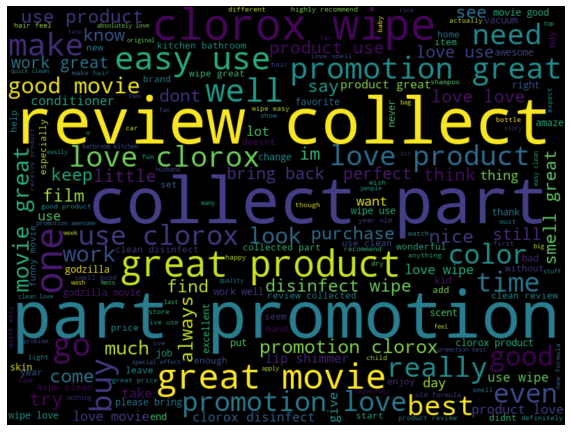

In [169]:
#let's form the word cloud
#A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes
all_words = ' '.join([text for text in review_df['text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 600, random_state = 21, max_font_size = 120).generate(all_words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [170]:
review_df["sentiment"].value_counts()

Positive    26154
Negative     1434
Name: sentiment, dtype: int64

In [171]:
#tokenizing text with Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
#from nltk.stem.snowball import SnowballStemmer

import os
#create a stemmer calling the class Snowball Stemmer
#stemmer = SnowballStemmer("english")

def tokens(x):
    x = x.split()
    stems = []
    [stems.append(stemmer.stem(word)) for word in x]
    return stems
def ps_tokenizer(text):
    return text
#define our own tokenizing function that we will pass into the TFIDFVectorizer. 
#We will also stem the words here.

#if os.path.exists('features.pickle'):
   # print('Pickled file alredy present, loading....')
   # features = pickle.load(open("features.pickle", "rb"))
   # print('Pickle file loaded.')
#else:
    #define the vectorizer
vectorizer = TfidfVectorizer(tokenizer = ps_tokenizer,stop_words = 'english', ngram_range=(1,1), min_df = 0.1)
    #fit the vectorizers to the data.
features = vectorizer.fit_transform(review_df['text'])
#(features)

C:\Users\Admin\anoconda4\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


In [172]:
features

<27588x25 sparse matrix of type '<class 'numpy.float64'>'
	with 519091 stored elements in Compressed Sparse Row format>

In [173]:
#converting user_sentiment in binary form

review_df["sentiment"]=review_df["sentiment"].apply(lambda x: 1 if x =='Positive' else 0)

In [174]:
review_df.head()

,sentiment,text
0,1,awesome love album good hip hop side current p...
1,1,good good flavor review collect part promotion
3,0,disappoint read review look buy one couple lub...
4,0,irritation husband buy gel u gel caused irrita...
5,0,worth boyfriend bought spice thing bedroom hig...


In [238]:
review['text'] = review_df['text']

### Model Building
We will build 3 models-
1.Logistic regression
2.Random Forest
3.XG Boost Classifier 

There is a imbalance is user_sentiment class, number of positives are more and number of negatives are less. We will require to handle class imbalance during/before modelling 



In [175]:
#dividing data into test & train to build sentiment analysis model
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = features

# Putting response variable to y
y = review_df["sentiment"]
# split into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =100)

In [176]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (22070, 25)
Number transactions y_train dataset:  (22070,)
Number transactions X_test dataset:  (5518, 25)
Number transactions y_test dataset:  (5518,)


In [177]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Admin\anoconda4\python.exe -m pip install --upgrade pip' command.


In [178]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)


C:\Users\Admin\anoconda4\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [179]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('After OverSampling, the shape of train_X: {}'.format(X_train_ns.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ns.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_ns == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_ns == 0)))

Before OverSampling, counts of label '1': 20927
Before OverSampling, counts of label '0': 1143 

After OverSampling, the shape of train_X: (36622, 25)
After OverSampling, the shape of train_y: (36622,) 

After OverSampling, counts of label '1': 20927
After OverSampling, counts of label '0': 15695


Training the model
Random Forest

In [180]:
from sklearn.ensemble import RandomForestClassifier
classifier1=RandomForestClassifier()
classifier1.fit(X_train_ns,y_train_ns)


RandomForestClassifier()

In [181]:
y_pred=classifier1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 110  181]
 [ 237 4990]]
0.9242479159115622
              precision    recall  f1-score   support

           0       0.32      0.38      0.34       291
           1       0.96      0.95      0.96      5227

    accuracy                           0.92      5518
   macro avg       0.64      0.67      0.65      5518
weighted avg       0.93      0.92      0.93      5518



No handles with labels found to put in legend.


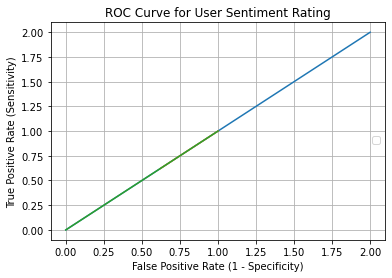

<Figure size 432x288 with 0 Axes>

In [182]:

from sklearn.metrics import roc_auc_score, roc_curve
plt.plot(roc_curve(y_test, y_pred), roc_curve(y_test, y_pred))
plt.title('ROC Curve for User Sentiment Rating')
plt.grid()
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(bbox_to_anchor=(1.0, .5))
plt.figure() 
plt.show()

Let's hypertune Random forest using randomised search

In [183]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [184]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train_ns,y_train_ns)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [185]:
rf_randomcv.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 890,
 'criterion': 'gini'}

In [186]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [187]:
best_random_grid=rf_randomcv.best_estimator_

In [188]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[ 107  184]
 [ 224 5003]]
Accuracy Score 0.926060166727075
Classification report:               precision    recall  f1-score   support

           0       0.32      0.37      0.34       291
           1       0.96      0.96      0.96      5227

    accuracy                           0.93      5518
   macro avg       0.64      0.66      0.65      5518
weighted avg       0.93      0.93      0.93      5518



After tuning Random Forest we are getting accuracy of 93%

Training the model
Logistic Regression

In [189]:
classifier2 = LogisticRegression()
classifier2.fit(X_train_ns,y_train_ns)

LogisticRegression()

In [190]:
y_pred2=classifier2.predict(X_test)

print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))


[[ 206   85]
 [1022 4205]]
0.7993838347227257
              precision    recall  f1-score   support

           0       0.17      0.71      0.27       291
           1       0.98      0.80      0.88      5227

    accuracy                           0.80      5518
   macro avg       0.57      0.76      0.58      5518
weighted avg       0.94      0.80      0.85      5518



Accuracy of Logistic Regression is 80%

Training the model
XGBoost Regression

In [191]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [192]:
classifier3 = xgb.XGBClassifier(n_jobs = -1, objective = 'binary:logistic')
classifier3.fit(X_train_ns, y_train_ns)

C:\Users\Admin\anoconda4\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:58:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [193]:
y_pred3 = classifier3.predict(X_test)
predictions = [round(value) for value in y_pred3]

In [194]:
accuracy = accuracy_score(y_test, predictions)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[ 113  178]
 [ 251 4976]]
0.922254440014498
              precision    recall  f1-score   support

           0       0.31      0.39      0.35       291
           1       0.97      0.95      0.96      5227

    accuracy                           0.92      5518
   macro avg       0.64      0.67      0.65      5518
weighted avg       0.93      0.92      0.93      5518

Accuracy: 92.23%


Accuracy of Random Forest is coming as 93% hence its a good model we will consider Random Forest as final model.

In [219]:
import pickle as pkl

pkl.dump(vectorizer, open("tfidf.pkl", "wb"))
pkl.dump(review, open("data.pkl", "wb"))


In [197]:
import sys


In [220]:
sys.setrecursionlimit(10000)
pkl.dump(rf_randomcv, open('RF.pkl', 'wb'))

In [221]:
data = pkl.load(open('Deployment Capstone/dataset/data.pkl','rb'))

In [222]:
model_rec= pkl.load(open('Deployment Capstone/models/item_recommendation.pkl','rb'))

In [223]:
model_rec

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfsQoeilAPnD_xgfx5,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpftymALJeJML43CZ6y,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwithanx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zxcsdfd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zxjki,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
# Take the user ID as input
user_input = input("Enter your user name")
print(user_input)


Enter your user namezzdiane
zzdiane


In [240]:
d = model_rec.loc[user_input].sort_values(ascending=False)[0:5].index
d

Index(['AVpfvieo1cnluZ0-qdnu', 'AVpf-lMV1cnluZ0-ub0_', 'AVpf4WWN1cnluZ0-s7Wj',
       'AVpf3okQLJeJML43FMif', 'AVpf3VOfilAPnD_xjpun'],
      dtype='object', name='id')

0

In [241]:
df_pred = data[data.name.isin(d)]

In [242]:
df_pred

,id,brand,categories,manufacturer,name,reviews_doRecommend,reviews_rating,reviews_text,reviews_username,user_sentiment


In [243]:
tfidf = pkl.load(open('tfidf.pkl','rb'))

In [244]:
df_pred['text']

KeyError: 'text'

In [ ]:
features_pred = vectorizer.transform(df_pred['text'])
features_pred

In [ ]:
pred_data = classifier3.predict(features_pred)
predictions = [round(value) for value in pred_data]

In [ ]:
len(predictions)

In [ ]:
df_pred['predicted'] = predictions

In [ ]:
df_pred

In [ ]:
df_pred[df_pred['predicted']==1][['name', 'brand', 'categories']].drop_duplicates()[:2].reset_index(drop=True)